In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [82]:
data = pd.read_csv("datasets.csv")
data.drop(columns="id", inplace=True)
data.head()

,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
1,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,NaN,NaN,NaN,NaN,NaN,NaN,2,1
2,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
3,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
4,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1


In [83]:
data.dtypes

country_name       object
league_name        object
season             object
stage               int64
date               object
home_team          object
away_team          object
home_team_goal      int64
away_team_goal      int64
B365H             float64
B365D             float64
B365A             float64
BSH               float64
BSD               float64
BSA               float64
diff_goals          int64
target              int64
dtype: object

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    25979 non-null  object 
 1   league_name     25979 non-null  object 
 2   season          25979 non-null  object 
 3   stage           25979 non-null  int64  
 4   date            25979 non-null  object 
 5   home_team       25979 non-null  object 
 6   away_team       25979 non-null  object 
 7   home_team_goal  25979 non-null  int64  
 8   away_team_goal  25979 non-null  int64  
 9   B365H           22592 non-null  float64
 10  B365D           22592 non-null  float64
 11  B365A           22592 non-null  float64
 12  BSH             14161 non-null  float64
 13  BSD             14161 non-null  float64
 14  BSA             14161 non-null  float64
 15  diff_goals      25979 non-null  int64  
 16  target          25979 non-null  int64  
dtypes: float64(6), int64(5), object

In [85]:
data.nunique()

country_name        11
league_name         11
season               8
stage               38
date              1694
home_team          296
away_team          296
home_team_goal      11
away_team_goal      10
B365H              121
B365D               72
B365A              115
BSH                101
BSD                 59
BSA                 96
diff_goals          20
target               2
dtype: int64

In [86]:
data.duplicated().sum()

0

In [87]:
data.isnull().mean()

country_name      0.000000
league_name       0.000000
season            0.000000
stage             0.000000
date              0.000000
home_team         0.000000
away_team         0.000000
home_team_goal    0.000000
away_team_goal    0.000000
B365H             0.130375
B365D             0.130375
B365A             0.130375
BSH               0.454906
BSD               0.454906
BSA               0.454906
diff_goals        0.000000
target            0.000000
dtype: float64

<Axes: >

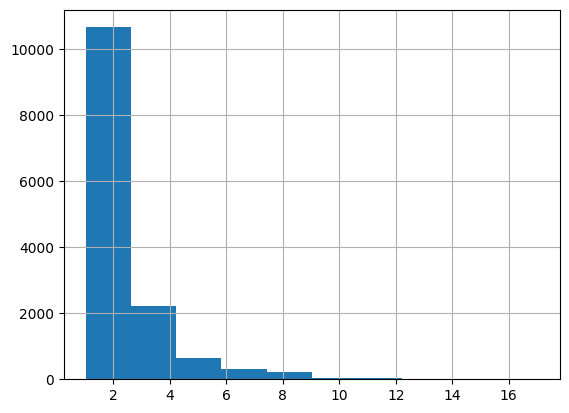

In [88]:
data.BSH.hist()

<Axes: >

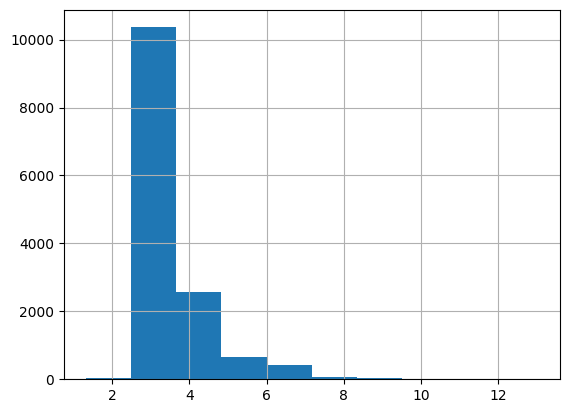

In [89]:
data.BSD.hist()

<Axes: >

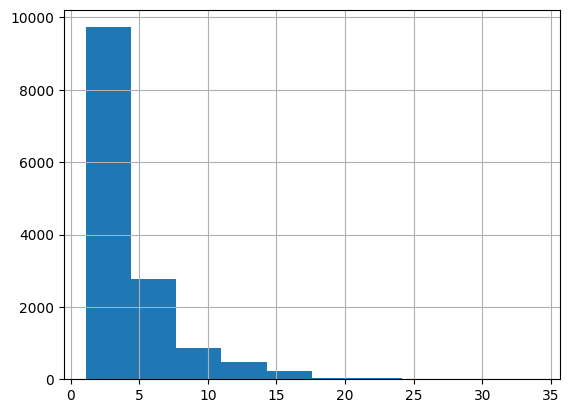

In [90]:
data.BSA.hist()

In [91]:
mean_B365H = data.B365H.mean()

mean_B365D = data.B365D.mean()

mean_B365A = data.B365A.mean()

mean_value_BSH = data.BSH.mean() 


mean_value_BSD = data.BSD.mean()


mean_value_BSA = data.BSA.mean()

print(mean_B365H)
print(mean_B365D)
print(mean_B365A)
print(mean_value_BSH)
print(mean_value_BSD)
print(mean_value_BSA)

2.6288177230878187
3.8396839589235126
4.66222202549575
2.497894216510134
3.6607421792246306
4.405662735682508


In [92]:
data['B365A'] = data.B365A.fillna(mean_B365A)

data['B365D'] = data.B365D.fillna(mean_B365D)

data['B365H'] = data.B365H.fillna(mean_B365H)

data['BSA'] = data.BSA.fillna(mean_value_BSA)

data['BSD'] = data.BSD.fillna(mean_value_BSD)

data['BSH'] = data.BSH.fillna(mean_value_BSH)

data.head(100)

,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,-1,1
1,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,2,1
2,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,-1,1
3,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,-1,1
4,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,France,France Ligue 1,2008/2009,2,2008-08-17 00:00:00,Olympique de Marseille,AJ Auxerre,4,0,1.570000,3.600000,6.500000,1.570000,3.300000,6.000000,4,1
96,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Eintracht Frankfurt,Hertha BSC Berlin,0,2,2.350000,3.300000,3.000000,2.250000,3.250000,2.880000,-2,1
97,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Borussia Mönchengladbach,VfB Stuttgart,1,3,2.750000,3.300000,2.500000,2.620000,3.100000,2.500000,-2,1
98,Poland,Poland Ekstraklasa,2008/2009,2,2008-08-17 00:00:00,Odra Wodzisław,Legia Warszawa,2,0,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,2,1


In [93]:
data.isnull().mean()

country_name      0.0
league_name       0.0
season            0.0
stage             0.0
date              0.0
home_team         0.0
away_team         0.0
home_team_goal    0.0
away_team_goal    0.0
B365H             0.0
B365D             0.0
B365A             0.0
BSH               0.0
BSD               0.0
BSA               0.0
diff_goals        0.0
target            0.0
dtype: float64

In [94]:
print(data['country_name'].unique())
print(data['league_name'].unique())

['Switzerland' 'Poland' 'France' 'Scotland' 'Germany' 'Belgium' 'England'
 'Portugal' 'Netherlands' 'Italy' 'Spain']
['Switzerland Super League' 'Poland Ekstraklasa' 'France Ligue 1'
 'Scotland Premier League' 'Germany 1. Bundesliga'
 'Belgium Jupiler League' 'England Premier League'
 'Portugal Liga ZON Sagres' 'Netherlands Eredivisie' 'Italy Serie A'
 'Spain LIGA BBVA']


In [95]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(data['country_name'])
data['country_name'] = le.transform(data['country_name'])

print(data['country_name'].unique())

[10  6  2  8  3  0  1  7  5  4  9]


In [96]:
le.fit(data['league_name'])
data['league_name'] = le.transform(data['league_name'])

print(data['country_name'].unique())

[10  6  2  8  3  0  1  7  5  4  9]


In [97]:
le.fit(data['home_team'])
data['home_team'] = le.transform(data['home_team'])

le.fit(data['away_team'])
data['away_team'] = le.transform(data['away_team'])

data.head(100)

,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
0,10,10,2008/2009,1,2008-07-18 00:00:00,24,76,1,2,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,-1,1
1,10,10,2008/2009,1,2008-07-19 00:00:00,72,91,3,1,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,2,1
2,10,10,2008/2009,1,2008-07-20 00:00:00,84,98,1,2,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,-1,1
3,10,10,2008/2009,1,2008-07-20 00:00:00,173,100,1,2,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,-1,1
4,10,10,2008/2009,2,2008-07-23 00:00:00,76,117,1,0,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,2008/2009,2,2008-08-17 00:00:00,180,8,4,0,1.570000,3.600000,6.500000,1.570000,3.300000,6.000000,4,1
96,3,3,2008/2009,1,2008-08-17 00:00:00,65,126,0,2,2.350000,3.300000,3.000000,2.250000,3.250000,2.880000,-2,1
97,3,3,2008/2009,1,2008-08-17 00:00:00,35,275,1,3,2.750000,3.300000,2.500000,2.620000,3.100000,2.500000,-2,1
98,6,6,2008/2009,2,2008-08-17 00:00:00,178,153,2,0,2.628818,3.839684,4.662222,2.497894,3.660742,4.405663,2,1


<Axes: ylabel='B365H'>

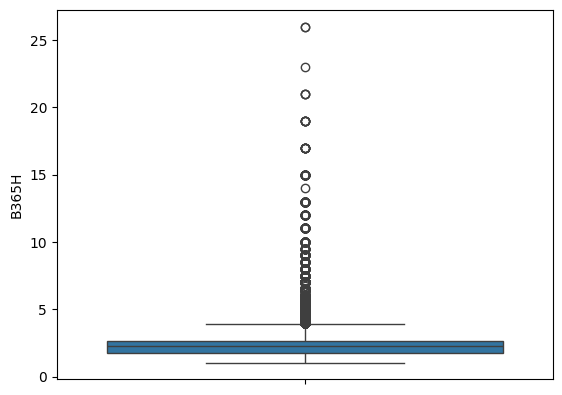

In [98]:
sns.boxplot( y='B365H', data=data)

In [99]:
IQR1 = data["B365H"].quantile(0.75) - data["B365H"].quantile(0.25)

lower_B365H_limit = data["B365H"].quantile(0.25) - (IQR1 * 1.5)
upper_B365H_limit = data["B365H"].quantile(0.75) + (IQR1 * 1.5)

print(lower_B365H_limit)
print(upper_B365H_limit)

0.43000000000000016
3.9499999999999997


In [100]:
data["B365H"]= np.where(data["B365H"] > upper_B365H_limit, upper_B365H_limit,
            np.where(data["B365H"] < lower_B365H_limit, lower_B365H_limit, data["B365H"]))



<Axes: ylabel='B365H'>

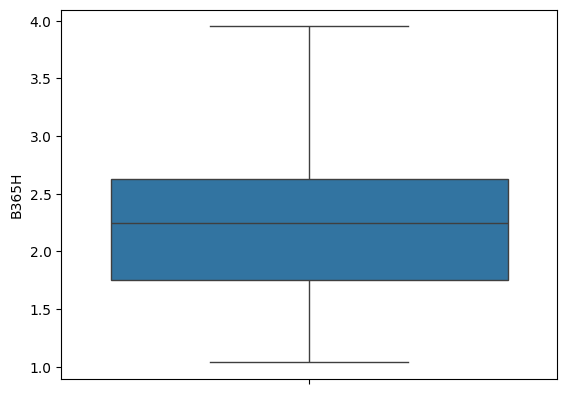

In [101]:
sns.boxplot( y='B365H', data=data)

<Axes: ylabel='B365A'>

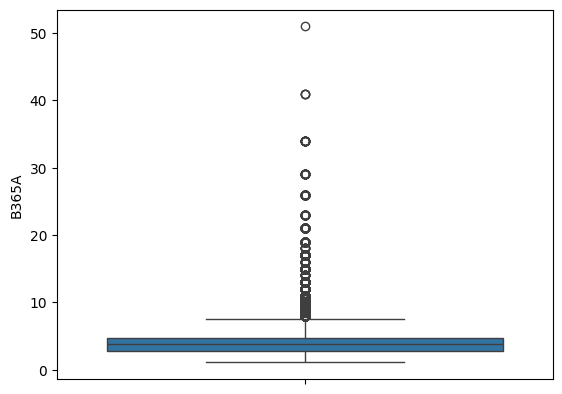

In [102]:
sns.boxplot( y='B365A', data=data)

In [103]:
IQR2 = data["B365A"].quantile(0.75) - data["B365A"].quantile(0.25)

lower_B365A_limit = data["B365A"].quantile(0.25) - (IQR2 * 1.5)
upper_B365A_limit = data["B365A"].quantile(0.75) + (IQR2 * 1.5)

print(lower_B365A_limit)
print(upper_B365A_limit)

-0.37499999999999956
7.824999999999999


In [104]:
data["B365A"]= np.where(data["B365A"] > upper_B365A_limit, upper_B365A_limit,
            np.where(data["B365A"] < lower_B365A_limit, lower_B365A_limit, data["B365A"]))



<Axes: ylabel='B365A'>

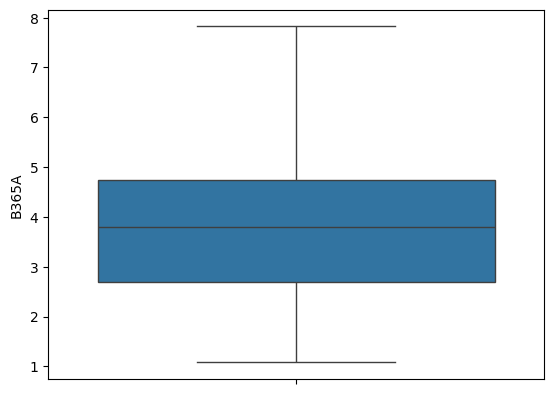

In [105]:
sns.boxplot( y='B365A', data=data)

<Axes: ylabel='B365D'>

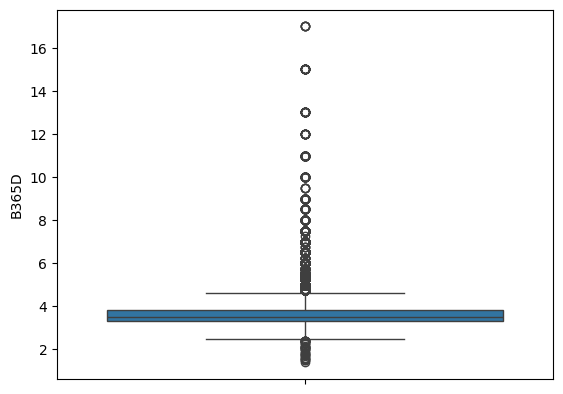

In [106]:
sns.boxplot( y='B365D', data=data)

In [107]:
IQR3 = data["B365D"].quantile(0.75) - data["B365D"].quantile(0.25)

lower_B365D_limit = data["B365D"].quantile(0.25) - (IQR3 * 1.5)
upper_B365D_limit = data["B365D"].quantile(0.75) + (IQR3 * 1.5)

print(lower_B365D_limit)
print(upper_B365D_limit)

2.490474061614731
4.649209897308782


In [108]:
data["B365D"]= np.where(data["B365D"] > upper_B365D_limit, upper_B365D_limit,
            np.where(data["B365D"] < lower_B365D_limit, lower_B365D_limit, data["B365D"]))



<Axes: ylabel='B365D'>

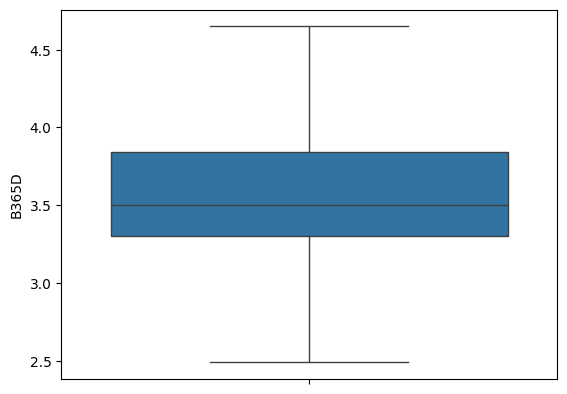

In [109]:
sns.boxplot( y='B365D', data=data)

<Axes: ylabel='BSH'>

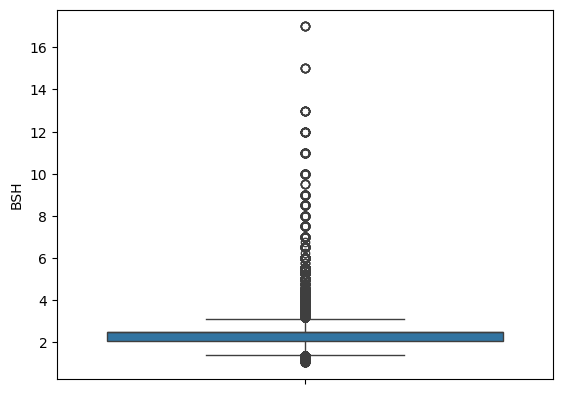

In [110]:
sns.boxplot( y='BSH', data=data)

In [111]:
IQR4 = data["BSH"].quantile(0.75) - data["BSH"].quantile(0.25)

lower_BSH_limit = data["BSH"].quantile(0.25) - (IQR4 * 1.5)
upper_BSH_limit = data["BSH"].quantile(0.75) + (IQR4 * 1.5)

print(lower_BSH_limit)
print(upper_BSH_limit)

1.3781586752347987
3.169735541275335


In [112]:
data["BSH"]= np.where(data["BSH"] > upper_BSH_limit, upper_BSH_limit,
            np.where(data["BSH"] < lower_BSH_limit, lower_BSH_limit, data["BSH"]))



<Axes: ylabel='BSH'>

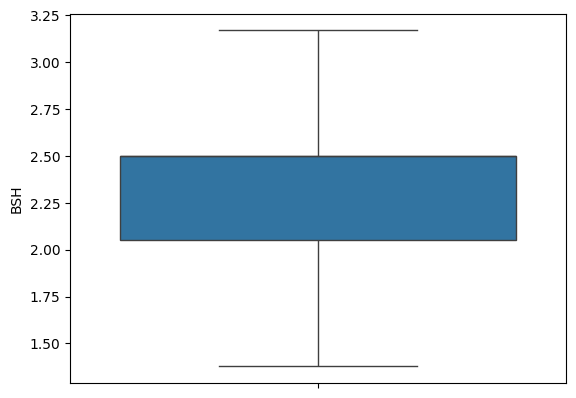

In [113]:
sns.boxplot( y='BSH', data=data)

<Axes: ylabel='BSD'>

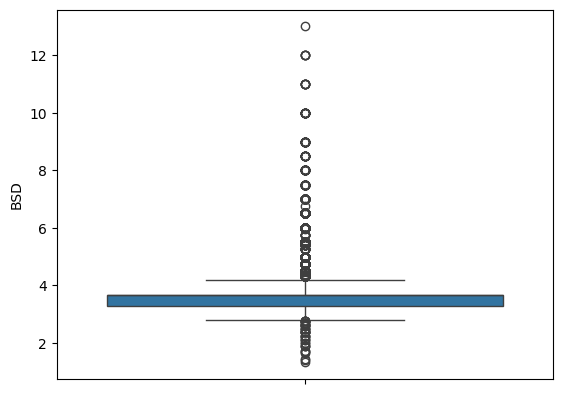

In [114]:
sns.boxplot( y='BSD', data=data)

In [115]:
IQR5 = data["BSD"].quantile(0.75) - data["BSD"].quantile(0.25)

lower_BSD_limit = data["BSD"].quantile(0.25) - (IQR5 * 1.5)
upper_BSD_limit = data["BSD"].quantile(0.75) + (IQR5 * 1.5)

print(lower_BSD_limit)
print(upper_BSD_limit)

2.7588867311630536
4.201855448061577


In [116]:
data["BSD"]= np.where(data["BSD"] > upper_BSD_limit, upper_BSD_limit,
            np.where(data["BSD"] < lower_BSD_limit, lower_BSD_limit, data["BSD"]))



<Axes: ylabel='BSD'>

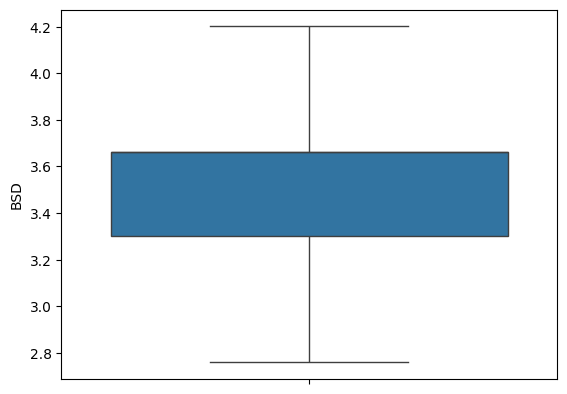

In [117]:
sns.boxplot( y='BSD', data=data)

<Axes: ylabel='BSA'>

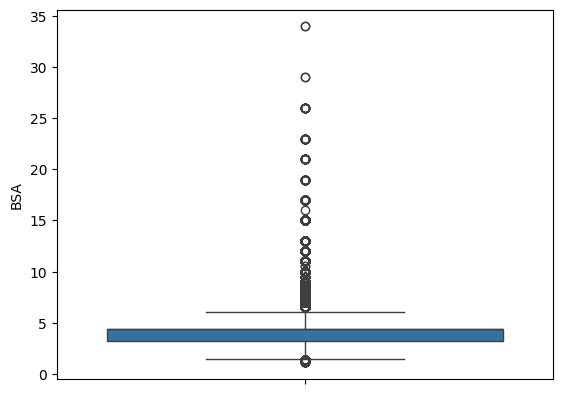

In [118]:
sns.boxplot( y='BSA', data=data)

In [119]:
IQR6 = data["BSA"].quantile(0.75) - data["BSA"].quantile(0.25)

lower_BSA_limit = data["BSA"].quantile(0.25) - (IQR6 * 1.5)
upper_BSA_limit = data["BSA"].quantile(0.75) + (IQR6 * 1.5)

print(lower_BSA_limit)
print(upper_BSA_limit)

1.3915058964762381
6.21415683920627


In [120]:
data["BSA"]= np.where(data["BSA"] > upper_BSA_limit, upper_BSA_limit,
            np.where(data["BSA"] < lower_BSA_limit, lower_BSA_limit, data["BSA"]))



<Axes: ylabel='BSA'>

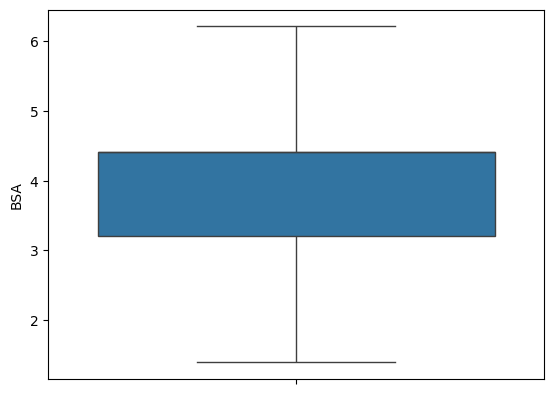

In [121]:
sns.boxplot( y='BSA', data=data)

In [122]:
data['date'] = pd.to_datetime(data['date'])

In [123]:
data['hour'] = data['date'].dt.hour
data['min'] = data['date'].dt.minute

In [124]:
data['date'].dt.isocalendar()
data['month'] = data['date'].dt.month
data['day_month'] = data['date'].dt.day
data['year']= data['date'].dt.year
data.drop(columns=['date'], inplace=True)

In [125]:
data.head()

,country_name,league_name,season,stage,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,...,BSH,BSD,BSA,diff_goals,target,hour,min,month,day_month,year
0,10,10,2008/2009,1,24,76,1,2,2.628818,3.839684,...,2.497894,3.660742,4.405663,-1,1,0,0,7,18,2008
1,10,10,2008/2009,1,72,91,3,1,2.628818,3.839684,...,2.497894,3.660742,4.405663,2,1,0,0,7,19,2008
2,10,10,2008/2009,1,84,98,1,2,2.628818,3.839684,...,2.497894,3.660742,4.405663,-1,1,0,0,7,20,2008
3,10,10,2008/2009,1,173,100,1,2,2.628818,3.839684,...,2.497894,3.660742,4.405663,-1,1,0,0,7,20,2008
4,10,10,2008/2009,2,76,117,1,0,2.628818,3.839684,...,2.497894,3.660742,4.405663,1,1,0,0,7,23,2008


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    25979 non-null  int32  
 1   league_name     25979 non-null  int32  
 2   season          25979 non-null  object 
 3   stage           25979 non-null  int64  
 4   home_team       25979 non-null  int32  
 5   away_team       25979 non-null  int32  
 6   home_team_goal  25979 non-null  int64  
 7   away_team_goal  25979 non-null  int64  
 8   B365H           25979 non-null  float64
 9   B365D           25979 non-null  float64
 10  B365A           25979 non-null  float64
 11  BSH             25979 non-null  float64
 12  BSD             25979 non-null  float64
 13  BSA             25979 non-null  float64
 14  diff_goals      25979 non-null  int64  
 15  target          25979 non-null  int64  
 16  hour            25979 non-null  int32  
 17  min             25979 non-null 

In [127]:
data['season'] = data['season'].astype(str)
data[['start', 'end']] = data['season'].str.split('/', expand=True)
data['start_season'] = pd.to_numeric(data['start'])
data['end_season'] = pd.to_numeric(data['end'])
data.drop(columns=['season'], inplace=True)

In [128]:
data.head()

,country_name,league_name,stage,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,...,target,hour,min,month,day_month,year,start,end,start_season,end_season
0,10,10,1,24,76,1,2,2.628818,3.839684,4.662222,...,1,0,0,7,18,2008,2008,2009,2008,2009
1,10,10,1,72,91,3,1,2.628818,3.839684,4.662222,...,1,0,0,7,19,2008,2008,2009,2008,2009
2,10,10,1,84,98,1,2,2.628818,3.839684,4.662222,...,1,0,0,7,20,2008,2008,2009,2008,2009
3,10,10,1,173,100,1,2,2.628818,3.839684,4.662222,...,1,0,0,7,20,2008,2008,2009,2008,2009
4,10,10,2,76,117,1,0,2.628818,3.839684,4.662222,...,1,0,0,7,23,2008,2008,2009,2008,2009


In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    25979 non-null  int32  
 1   league_name     25979 non-null  int32  
 2   stage           25979 non-null  int64  
 3   home_team       25979 non-null  int32  
 4   away_team       25979 non-null  int32  
 5   home_team_goal  25979 non-null  int64  
 6   away_team_goal  25979 non-null  int64  
 7   B365H           25979 non-null  float64
 8   B365D           25979 non-null  float64
 9   B365A           25979 non-null  float64
 10  BSH             25979 non-null  float64
 11  BSD             25979 non-null  float64
 12  BSA             25979 non-null  float64
 13  diff_goals      25979 non-null  int64  
 14  target          25979 non-null  int64  
 15  hour            25979 non-null  int32  
 16  min             25979 non-null  int32  
 17  month           25979 non-null 

<Axes: xlabel='target', ylabel='count'>

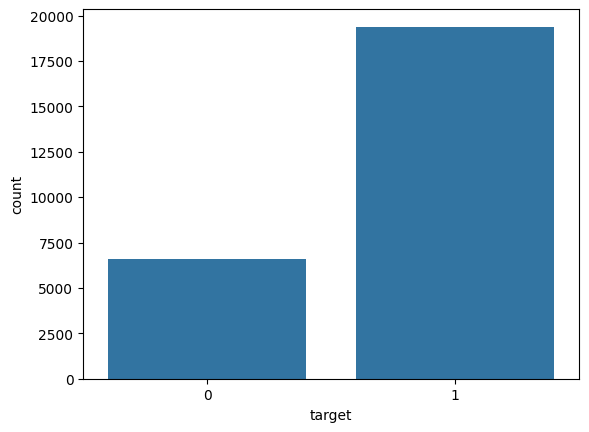

In [130]:
sns.countplot(x='target',data=data)

In [131]:
X = data.drop('target', axis=1)
y = data[['target']]


In [132]:
y["target"].value_counts()

target
1    19383
0     6596
Name: count, dtype: int64

In [133]:
# install imblearn using the following pip command
# pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=2)
X_us, y_us = sm.fit_resample(X, y)

In [134]:
y_us["target"].value_counts()

target
1    19383
0    19383
Name: count, dtype: int64

<Axes: xlabel='target', ylabel='count'>

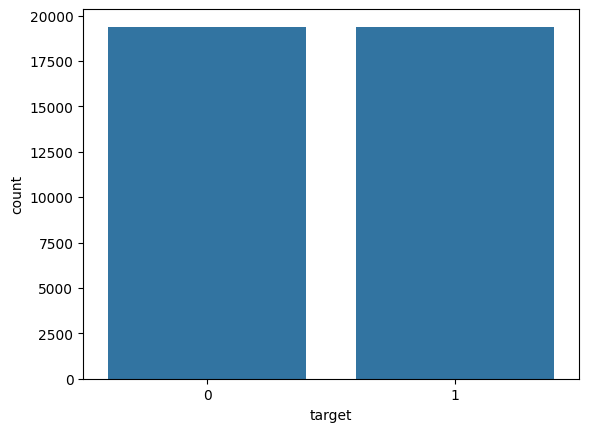

In [135]:
sns.countplot(x='target',data=y_us)

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X_us, y_us, test_size=0.3, random_state=42)

In [137]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(27136, 23)
(11630, 23)
(27136, 1)
(11630, 1)


In [139]:
# Create a logistic regression model
model = LogisticRegression(max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.84      0.68      0.75      5867
           1       0.73      0.87      0.79      5763

    accuracy                           0.77     11630
   macro avg       0.78      0.77      0.77     11630
weighted avg       0.78      0.77      0.77     11630



In [140]:
from tkinter import *
from tkinter import messagebox
from tkinter import ttk
import warnings

In [141]:
# Form
form = Tk()
form.title("DỰ ĐOÁN PHÂN LỚP TRẬN BÓNG ĐÁ")
form.geometry("900x850") # khởi tạo cửa sổ 
form.configure(background="#D3E3D3")
warnings.filterwarnings("ignore", category=UserWarning)

In [142]:
leagueOptions = countryOptions = ['0','1', '2','3','4','5','6','7','8','9','10']
stageOptions = ['1', '2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38']
homegoalOptions = awaygoalOptions = ['0','1', '2','3','4','5','6','7','8','9','10']
diffgoalOptions = ['-9','-8','-7','-6','-5','-4','-3','-2','-1','0','1', '2','3','4','5','6','7','8','9','10']

In [143]:
# Information
lable_ten = Label(form, text = "Nhập thông tin trận bóng:", font=("Times New Roman", 12,"bold"), fg="red",background="#D3E3D3")
# Tạo 1 label có text là ...., font là Aria Bold, size là 10px và có màu chữ là đỏ
lable_ten.grid(row = 1, column = 1, padx = 40, pady = 10) # gán vị trí cho label, thêm độ đệm theo trục X(ngang) là 40px là theo trục y(dọc) là 10px


In [144]:
# country_name
lable_country_name = Label(form, text = "Country Name",font=("Times New Roman", 12),background="#D3E3D3")
lable_country_name.grid(row = 2, column = 1, padx = 40, pady = 10)
comboBox_country_name = ttk.Combobox(form, values=countryOptions)
comboBox_country_name.grid(row = 2, column = 2)

In [145]:
# league_name
lable_league_name = Label(form, text = "League Name",font=("Times New Roman", 12),background="#D3E3D3")
lable_league_name.grid(row = 2, column = 3, pady = 10, padx = 40)
comboBox_league_name = ttk.Combobox(form, values=leagueOptions)
comboBox_league_name.grid(row=2, column=4)

In [146]:
# stage
lable_stage = Label(form, text = "Stage",font=("Times New Roman", 12),background="#D3E3D3")
lable_stage.grid(row = 3, column = 1,pady = 10, padx = 40)
comboBox_stage = ttk.Combobox(form, values=stageOptions)
comboBox_stage.grid(row=3, column=2)

In [147]:
# home_team
lable_home_team = Label(form, text = "Home Team",font=("Times New Roman", 12),background="#D3E3D3")
lable_home_team.grid(row = 3, column = 3, pady = 10, padx = 40)
textbox_home_team = Entry(form)
textbox_home_team.grid(row=3, column=4)

In [148]:
# away_team
lable_away_team = Label(form, text = "Away Team",font=("Times New Roman", 12),background="#D3E3D3")
lable_away_team.grid(row = 4, column = 1, pady = 10, padx = 40 )
textbox_away_team = Entry(form)
textbox_away_team.grid(row = 4, column = 2)

In [149]:
# home_team_goal
lable_home_team_goal = Label(form, text = "Home Team Goal",font=("Times New Roman", 12),background="#D3E3D3")
lable_home_team_goal.grid(row = 4, column = 3, pady = 10, padx = 40 )
comboBox_home_team_goal = ttk.Combobox(form, values=homegoalOptions)
comboBox_home_team_goal.grid(row=4, column=4)

In [150]:
# away_team_goal
lable_away_team_goal = Label(form, text = "Away Team Goal",font=("Times New Roman", 12),background="#D3E3D3")
lable_away_team_goal.grid(row = 5, column = 1, pady = 10, padx = 40 )
comboBox_away_team_goal = ttk.Combobox(form, values=awaygoalOptions)
comboBox_away_team_goal.grid(row = 5, column = 2)

In [151]:
# B365H
lable_B365H = Label(form, text = "B365H",font=("Times New Roman", 12),background="#D3E3D3")
lable_B365H.grid(row = 5, column = 3, pady = 10, padx = 40 )
textbox_B365H = Entry(form)
textbox_B365H.grid(row = 5, column = 4)

In [152]:
# B365D
lable_B365D = Label(form, text = "B365D",font=("Times New Roman", 12),background="#D3E3D3")
lable_B365D.grid(row = 6, column = 1, pady = 10, padx = 40 )
textbox_B365D = Entry(form)
textbox_B365D.grid(row = 6, column = 2)

In [153]:
# B365A
lable_B365A = Label(form, text = "B365A",font=("Times New Roman", 12),background="#D3E3D3")
lable_B365A.grid(row = 6, column = 3, pady = 10, padx = 40 )
textbox_B365A = Entry(form)
textbox_B365A.grid(row = 6, column = 4)

In [154]:
# BSH
lable_BSH = Label(form, text = "BSH",font=("Times New Roman", 12),background="#D3E3D3")
lable_BSH.grid(row = 7, column = 1, pady = 10, padx = 40 )
textbox_BSH = Entry(form)
textbox_BSH.grid(row = 7, column = 2)

In [155]:
# BSD
lable_BSD = Label(form, text = "BSD",font=("Times New Roman", 12),background="#D3E3D3")
lable_BSD.grid(row = 7, column = 3, pady = 10, padx = 40 )
textbox_BSD = Entry(form)
textbox_BSD.grid(row = 7, column = 4)

In [156]:
# BSA
lable_BSA = Label(form, text = "BSA",font=("Times New Roman", 12),background="#D3E3D3")
lable_BSA.grid(row = 8, column = 1, pady = 10, padx = 40 )
textbox_BSA = Entry(form)
textbox_BSA.grid(row = 8, column = 2)

In [157]:
# diff_goals
lable_diff_goals = Label(form, text = "Diff Goals",font=("Times New Roman", 12),background="#D3E3D3")
lable_diff_goals.grid(row = 8, column = 3, pady = 10, padx = 40 )
comboBox_diff_goals = ttk.Combobox(form, values=diffgoalOptions)
comboBox_diff_goals.grid(row = 8, column = 4)

In [158]:
# target
lable_target = Label(form, text = "Target",font=("Times New Roman", 12),background="#D3E3D3")
lable_target.grid(row = 9, column = 1, pady = 10, padx = 40 )
textbox_target = Entry(form)
textbox_target.grid(row = 9, column = 2)

In [159]:
print(data['diff_goals'].min())
print(data['diff_goals'].max())

-9
10


In [160]:
def dudoan():
    Country_Name = comboBox_country_name.get()
    League_Name = comboBox_league_name.get()
    Stage = comboBox_stage.get()
    Home_team = textbox_home_team.get()
    Away_team = textbox_away_team.get()
    Home_Team_Goal = comboBox_home_team_goal.get()
    Away_Team_Goal = comboBox_away_team_goal.get()
    B365Hp = textbox_B365H.get()
    B365Dp = textbox_B365D.get()
    B365Ap = textbox_B365A.get()
    BSHp = textbox_BSH.get()
    BSDp = textbox_BSD.get()
    BSAp = textbox_BSA.get()
    Diff_Goal = comboBox_diff_goals.get()
    Target = textbox_target.get()
    if ((Country_Name == '') or (League_Name == '') or (Stage == '') or (Home_team  == '') or (Away_team == '') or (Home_Team_Goal == '') or (Away_Team_Goal == '') or (B365Hp == '') or (B365Dp == '') or (B365Ap == '') or (BSHp == '') or (BSDp == '') or (BSAp == '') or (Diff_Goal =='')):
        messagebox.showinfo("Error", "Bạn cần nhập đầy đủ thông tin !")
    else:
        country_Name = int(Country_Name)
        league_Name = int(League_Name)
        stage = int(Stage)
        home_team = int(Home_team)
        away_team = int(Away_team)
        home_Team_Goal = int(Home_Team_Goal)
        away_Team_Goal = int(Away_Team_Goal)
        b365Hp = float(B365Hp)
        b365Dp = float(B365Dp)
        b365Ap = float(B365Ap)
        bSHp = float(BSHp)
        bSDp = float(BSDp)
        bSAp = float(BSAp)
        diff_Goal = int(Diff_Goal)
        targeT = int(Target)

        #nhan = bagging_logislic_model.predict([float(Arae), float(Perimeter), float(Compactness), float(Kernel_length), float(Kernel_width), float(Asymmetry_coefficient), float(Groove_length), float(Species)])
        #predict =np.array([area, perimeter, compactness, kernel_length, kernel_width, asymmetry_coefficient, groove_length, species]).reshape(1,-1)
        predict = np.array([int(Country_Name), int(League_Name), int(Stage), int(Home_team), int(Away_team), int(Home_Team_Goal), int(Away_Team_Goal), float(B365Hp), float(B365Dp),float(B365Ap),float(BSHp),float(BSDp),float(BSAp),int(Diff_Goal),int(Target)]).reshape(1, -1)
        #y_kqua = bagging_logislic_model.predict(predict)
        y_kqua = model.predict(X_test_scaled)
        #y_kqua = bagging_PLA_model.predict(predict)
        lbl.configure(text=y_kqua[0])

acc = Label(form, text="Độ đo đánh giá chất lượng mô hình: ", font=("Times New Roman", 12,"bold"), fg="red", pady=20,background="#D3E3D3")
acc.grid(column=1, row=10)

# Accuracy
Accuracy = Label(form, text="Accuracy: ",font=("Times New Roman", 14,"bold"),anchor='w',background="#D3E3D3")# anchor='w' đặt văn bản bên trái, anchor='e' đặt văn bản bên phải
Accuracy.grid(column=2, row=11)
Label(form, text=accuracy,anchor='e',font=("Times New Roman", 12,"bold"),background="#D3E3D3").grid(column=3, row=11)

# Report
Report = Label(form, text="Report: ",font=("Times New Roman", 14,"bold"),anchor='w',background="#D3E3D3")# anchor='w' đặt văn bản bên trái, anchor='e' đặt văn bản bên phải
Report.grid(column=2, row=12)
Label(form, text=report,anchor='e',font=("Times New Roman", 12,"bold"),background="#D3E3D3").grid(column=3, row=12)

# Click
button_cart = Button(form, text = 'Kết quả dự đoán theo MLP',font=("Times New Roman", 12,"bold"), command = dudoan)
button_cart.grid(row = 15, column = 1, pady = 20)
lbl = Label(form, text=".....",font=("Times New Roman", 16,"bold"),background="#D3E3D3", pady=10)
lbl.grid(column=2, row=15)
form.mainloop()